In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib


In [17]:
df = pd.read_csv(r"C:\Users\Anand\OneDrive - Rathinam Group Of Institutions\Desktop\Random Forest\Data_Set\heart_disease_dataset.csv")
df.head()


,6Age,Sex,Blood_Pressure,Cholesterol,Max_Heart_Rate,Heart_Disease
0,68,Female,105,191,183,1
1,58,Male,97,249,176,1
2,44,Male,93,190,131,0
3,72,Female,93,183,133,1
4,37,Male,145,166,103,1


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   6Age            500 non-null    int64 
 1   Sex             500 non-null    object
 2   Blood_Pressure  500 non-null    int64 
 3   Cholesterol     500 non-null    int64 
 4   Max_Heart_Rate  500 non-null    int64 
 5   Heart_Disease   500 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 23.6+ KB


In [4]:
le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"])

df.head()


,6Age,Sex,Blood_Pressure,Cholesterol,Max_Heart_Rate,Heart_Disease
0,68,0,105,191,183,1
1,58,1,97,249,176,1
2,44,1,93,190,131,0
3,72,0,93,183,133,1
4,37,1,145,166,103,1


In [5]:
X = df.drop("Heart_Disease", axis=1)
y = df["Heart_Disease"]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
rf_model = RandomForestClassifier(
    n_estimators=200,       
    max_depth=10,            
    min_samples_split=5,
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [9]:
y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.48


In [10]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.42      0.58      0.49        43
           1       0.56      0.40      0.47        57

    accuracy                           0.48       100
   macro avg       0.49      0.49      0.48       100
weighted avg       0.50      0.48      0.48       100



In [11]:
confusion_matrix(y_test, y_pred)


array([[25, 18],
       [34, 23]])

In [12]:
for n in [50, 100, 200, 300]:
    model = RandomForestClassifier(
        n_estimators=n,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f"Estimators: {n} | Accuracy: {acc:.4f}")


Estimators: 50 | Accuracy: 0.4300
Estimators: 100 | Accuracy: 0.4600
Estimators: 200 | Accuracy: 0.4500
Estimators: 300 | Accuracy: 0.4500


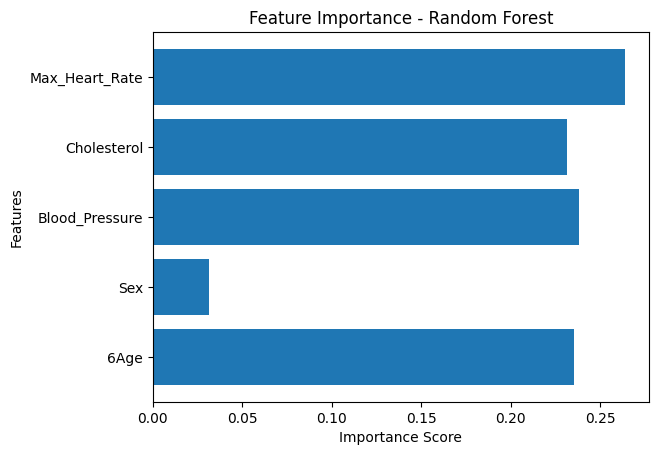

In [13]:
importances = rf_model.feature_importances_
features = X.columns

plt.figure()
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.show()


In [14]:
estimators = [50, 100, 200, 300]
accuracies = []

for n in estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

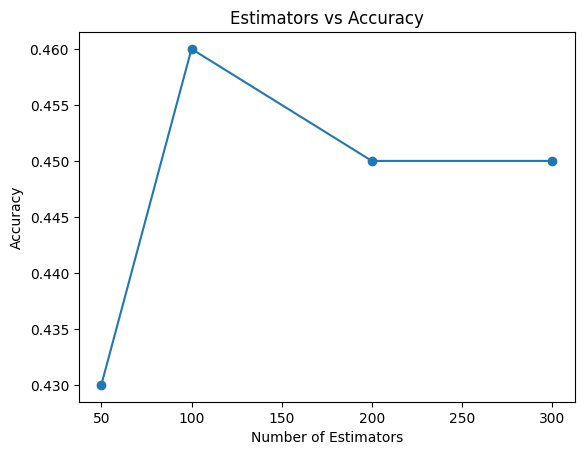

In [15]:
plt.figure()
plt.plot(estimators, accuracies, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Estimators vs Accuracy")
plt.show()


In [16]:
joblib.dump(rf_model, "heart_rf_model.pkl")
joblib.dump(scaler, "heart_scaler.pkl")
joblib.dump(le_sex, "sex_encoder.pkl")

print("Model and files saved successfully!")


Model and files saved successfully!
